## **2D Poisson Equation**

Poisson's equation is the same as Laplace's equation but with a source term on the RHS:

$$ \frac{\partial^{2}{p}}{\partial{x^{2}}} + \frac{\partial^{2}{p}}{\partial{y^{2}}} = b $$

This must be discretised using the central difference scheme:

$$  \frac{p_{i + 1,j}^{n} - 2p_{i,j}^{n} + p_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{p_{i,j + 1}^{n} - 2p_{i,j}^{n} + p_{i, j - 1}^{n}}{\Delta{y^{2}}} = b_{i,j}^{n}  $$

We can solve for $p_{i,j}^{n}$ as follows:

$$  p_{i,j}^{n} = \frac{\Delta{y^{2}}(p_{i + 1,j}^{n} + p_{i - 1,j}^{n}) + \Delta{x^{2}}(p_{i,j + 1}^{n} + p_{i,j - 1}^{n}) - b_{i,j}^{n}\Delta{x^{2}}\Delta{y^{2}}}{2(\Delta{x^{2}} + \Delta{y^{2}})}  $$

#### **Initial Conditions:**

$$  p = 0 \quad\forall{x_{i} \in X^{2}}  $$

$$
\begin{aligned}
    b_{i=0.25nx, j=0.25ny} &= 100 \\
    b_{i=0.75nx, j=0.75ny} &= -100 \\
    b_{i,j} &= 0 \text{ everywhere else}
\end{aligned}
$$

#### **Boundary Conditions:**

$$
\begin{aligned}
    p(x = 0) &= 0\\
    p(x = 2) &= 2\\
    \frac{\partial{p}}{\partial{y}}(y = 0, 1) &= 0\\
\end{aligned}
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p  = np.zeros((ny, nx))
pd = np.zeros((ny, nx))
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

In [3]:
for it in range(nt):
    pd = p.copy()
    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 + (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 - b[1:-1, 1:-1] * dx**2 * dy**2) / (2 * (dx**2 + dy**2)))

    # boundary conditions
    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0

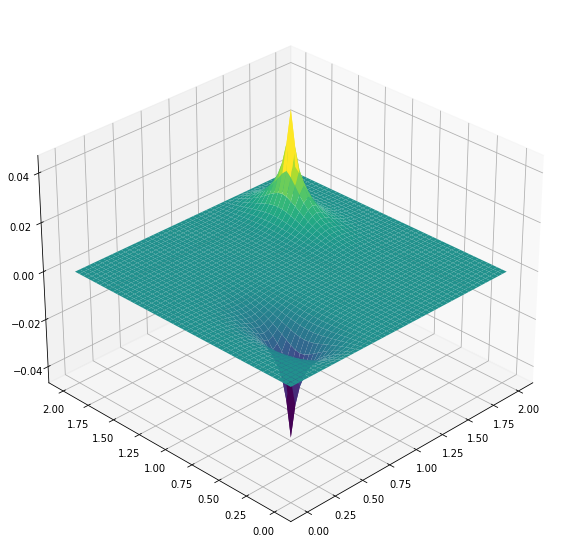

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, p, cmap='viridis')
ax.view_init(30, 225)